In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Code

##Preparing

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

In [3]:
names = ['Apple Braeburn','Apple Golden','Apple Granny Smith','Apple Pink Lady','Apple Red Yellow',
        'Apricot','Avocado','Banana Red','Banana','Beetroot',
         'Blueberry','Cactus fruit','Cauliflower','Cherry Yellow','Coconut',
         'Corn or Maize','Daisy','Dandelion','Tulips','Watermelon'
]

In [4]:
len(names)

20

In [5]:
image_size = 224
img_channel = 3 #Ảnh màu RGB
batch_size = 64
color_mode = 'rgb'

##Data

In [6]:
train_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Đồ án Deeplearning/0_Data/Fruit_Flower_Veg_Train_Dev',
    labels = 'inferred', #lấy tên label là tên của thư mục
    label_mode = 'categorical', #phân lớp 2 biến đầu ra => nhị phân
    class_names = names,
    color_mode = color_mode,
    batch_size = batch_size,
    image_size = (image_size, image_size),
    interpolation = 'bilinear', #Thông số mặc định
)

Found 14985 files belonging to 20 classes.


In [7]:
dev_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Đồ án Deeplearning/0_Data/Fruit_Flower_Veg_Train_Dev',
    labels = 'inferred', #lấy tên label là tên của thư mục
    label_mode = 'categorical', #phân lớp 2 biến đầu ra => nhị phân
    class_names = names,
    color_mode = color_mode,
    batch_size = batch_size,
    image_size = (image_size, image_size),
    interpolation = 'bilinear', #Thông số mặc định
    subset = "validation",
    seed = 1,
    validation_split = 0.1,
)

Found 14985 files belonging to 20 classes.
Using 1498 files for validation.


In [8]:
test_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Đồ án Deeplearning/0_Data/Fruit_Flower_Veg_Train_Dev',
    labels = 'inferred', #lấy tên label là tên của thư mục
    label_mode = 'categorical', #phân lớp 2 biến đầu ra => nhị phân
    class_names = names,
    color_mode = color_mode,
    batch_size = batch_size,
    image_size = (image_size, image_size),
    interpolation = 'bilinear', #Thông số mặc định
)

Found 14985 files belonging to 20 classes.


##Faster RCNN

In [9]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16

vggmodel = VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 3s 0us/step


In [10]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False
X= vggmodel.layers[-2].output
predictions = Dense(20, activation="softmax")(X)
model_final = Model(inputs = vggmodel.inputs, outputs = predictions)
opt = Adam(lr=0.0001)

model_final.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics= 'accuracy')
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
history_faster_RCNN = model_final.fit(train_data, epochs = 10, validation_data=dev_data)

Epoch 1/10
235/235 [==============================] - 1590s 6s/step - loss: 0.1416 - accuracy: 0.9628 - val_loss: 0.0214 - val_accuracy: 0.9933
Epoch 2/10
235/235 [==============================] - 93s 393ms/step - loss: 0.0352 - accuracy: 0.9909 - val_loss: 0.0152 - val_accuracy: 0.9953
Epoch 3/10
235/235 [==============================] - 93s 392ms/step - loss: 0.0297 - accuracy: 0.9933 - val_loss: 0.0264 - val_accuracy: 0.9940
Epoch 4/10
235/235 [==============================] - 93s 392ms/step - loss: 0.0810 - accuracy: 0.9847 - val_loss: 0.1230 - val_accuracy: 0.9826
Epoch 5/10
235/235 [==============================] - 93s 391ms/step - loss: 0.0430 - accuracy: 0.9923 - val_loss: 0.0305 - val_accuracy: 0.9960
Epoch 6/10
235/235 [==============================] - 93s 393ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.0024 - val_accuracy: 0.9980
Epoch 7/10
235/235 [==============================] - 93s 391ms/step - loss: 0.0224 - accuracy: 0.9960 - val_loss: 0.0014 - val_acc

## Đánh giá mô hình

<Figure size 432x288 with 0 Axes>

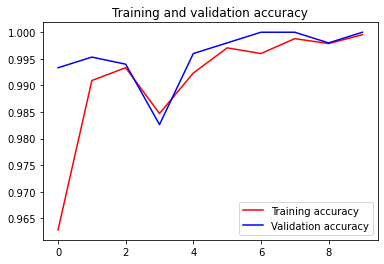

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history_faster_RCNN.history['accuracy']
val_acc = history_faster_RCNN.history['val_accuracy']
loss = history_faster_RCNN.history['loss']
val_loss = history_faster_RCNN.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [13]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as np

y_pred_total = []
y_true = []

for img, label in dev_data:
    y_pred = model_final.predict(img)
    y_pred_total += np.argmax(y_pred,axis=-1).tolist()
    y_true += np.array(np.argmax(label,axis=-1)).flatten().tolist()
    
print(accuracy_score(y_true, y_pred_total)*100)
print(f1_score(y_true, y_pred_total,average='macro')*100)
print(recall_score(y_true,y_pred_total,average='macro')*100)
print(precision_score(y_true,y_pred_total,average='macro')*100)

100.0
100.0
100.0
100.0


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_total, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        67
           1      1.000     1.000     1.000       124
           2      1.000     1.000     1.000        64
           3      1.000     1.000     1.000        59
           4      1.000     1.000     1.000       145
           5      1.000     1.000     1.000        75
           6      1.000     1.000     1.000        52
           7      1.000     1.000     1.000        63
           8      1.000     1.000     1.000        61
           9      1.000     1.000     1.000        65
          10      1.000     1.000     1.000        52
          11      1.000     1.000     1.000        71
          12      1.000     1.000     1.000        88
          13      1.000     1.000     1.000        77
          14      1.000     1.000     1.000        67
          15      1.000     1.000     1.000        57
          16      1.000     1.000     1.000        68
          17      1.000    

In [21]:
model_final.save('model_Faster_RCNN.h5')

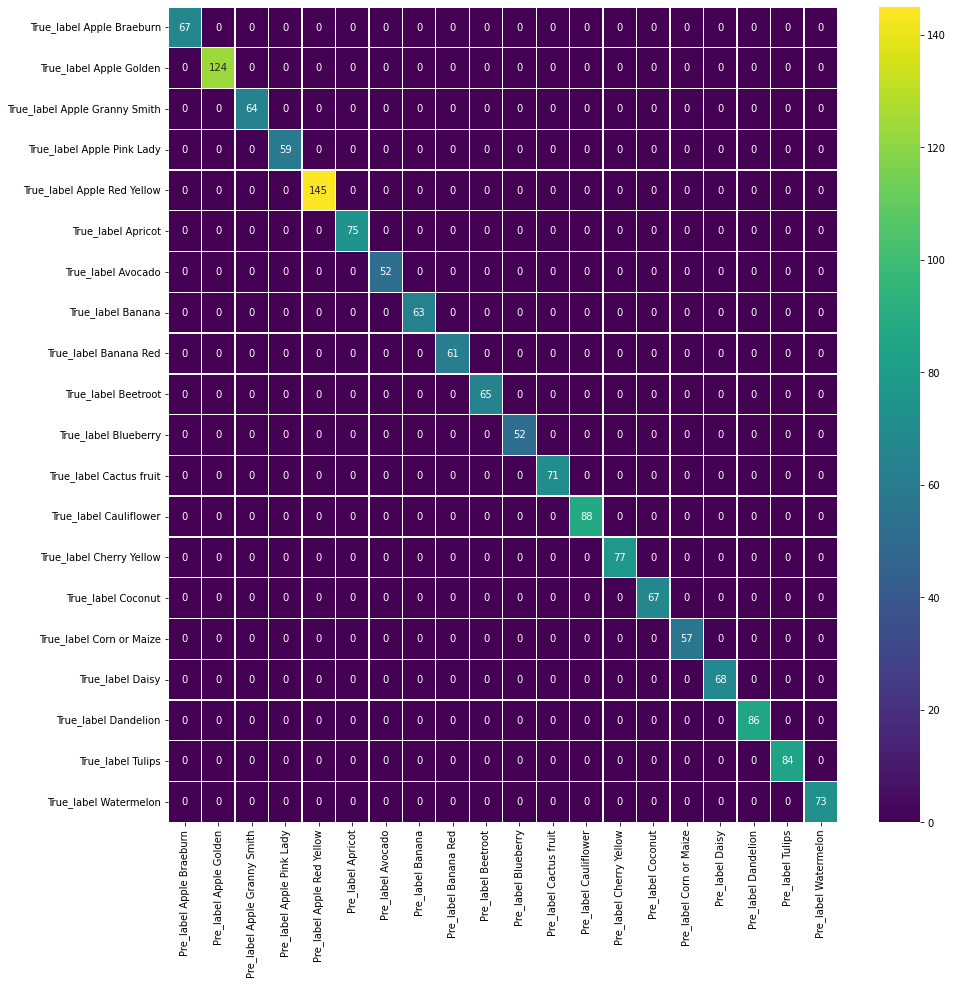

In [56]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15,15))

def plot_matrix(y_dung, y_dudoan):
  labels = unique_labels(names)
  column = [f'Pre_label {label}' for label in labels]
  indices = [f'True_label {label}' for label in labels ]
  table = pd.DataFrame(confusion_matrix(y_dung, y_dudoan), columns= column, index = indices)

  return sns.heatmap(table, annot = True, fmt='d', cmap = 'viridis', linewidths=0.4, ax=ax)

plot_matrix(y_true, y_pred_total)  